In [1]:
import pandas

In [2]:
df = pandas.read_csv("run_log.csv", sep="\t", names=["doi", "file", "result"])

In [3]:
df.head()

,doi,file,result
0,doi:10.7910/DVN/BPON3K,fig_10_effect_of_winning_on_gov.R,success
1,doi:10.7910/DVN/BPON3K,fig_11_rd_placebo.R,success
2,doi:10.7910/DVN/BPON3K,fig_12_historical_trend.R,Error in library(data.table) : there is no pac...
3,doi:10.7910/DVN/BPON3K,fig_13_plot_loyalty_df_pct.R,Error in library(data.table) : there is no pac...
4,doi:10.7910/DVN/BPON3K,fig_14_effect_on_individual_parties.R,Error in library(data.table) : there is no pac...


In [4]:
df['result'].value_counts()

success                                                                                                                                                                                                                                                                                 884
time limit exceeded                                                                                                                                                                                                                                                                     631
Error in readChar(con, 5L, useBytes = TRUE) : cannot open the connection                                                                                                                                                                                                                266
Error in file(file, rt) : cannot open the connection                                                                                                

# Contain fig or plot in filename

In [10]:
def contain_fig(el):
    "checks if filename contains fig or plot"
    temp = el.lower()
    if "fig" in temp or "plot" in temp or "table" in temp:
        return 1
    if "step" in temp:
        return 2
    return 0

df['fig']=df["file"].apply(contain_fig)

In [11]:
df.head()

,doi,file,result,fig
0,doi:10.7910/DVN/BPON3K,fig_10_effect_of_winning_on_gov.R,success,1
1,doi:10.7910/DVN/BPON3K,fig_11_rd_placebo.R,success,1
2,doi:10.7910/DVN/BPON3K,fig_12_historical_trend.R,Error in library(data.table) : there is no pac...,1
3,doi:10.7910/DVN/BPON3K,fig_13_plot_loyalty_df_pct.R,Error in library(data.table) : there is no pac...,1
4,doi:10.7910/DVN/BPON3K,fig_14_effect_on_individual_parties.R,Error in library(data.table) : there is no pac...,1


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd

# plot style
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})

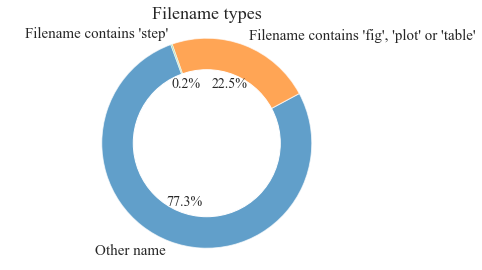

In [15]:
# Pie chart
labels = ['Other name', "Filename contains 'fig', 'plot' or 'table'", "Filename contains 'step'"]
sizes = [(df['fig'] == 0).sum(), (df['fig'] == 1).sum(), (df['fig'] == 2).sum()]
#colors = ['#99ff99', '#ff9999']
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 15
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=110,  textprops={'fontsize': 14}, wedgeprops={'alpha':0.7})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Filename types", size=18)
plt.tight_layout()

plt.show()
fig.savefig("plots/fig.png", dpi=100)

# Success rate

In [6]:
success = (df['result'] == 'success').sum()
print str(success)+ " out of " + str(total) +" => "+ str(success*1.0/total)

884 out of 5781 => 0.15291472063656808


In [7]:
til = (df['result'] == 'time limit exceeded').sum()
print str(til)+ " out of " + str(total) +" => "+ str(til*1.0/total)

631 out of 5781 => 0.10915066597474485


In [8]:
error = len(df[df['result'].str.contains("Error")])
print str(error)+ " out of " + str(total) +" => "+ str(error*1.0/total)

4198 out of 5781 => 0.72617194257


In [9]:
155+46+25

226

# Pie

In [10]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['Error',  'Success', "Time Limit Exceeded"]
sizes = [error, success, til]
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 15
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=80,  textprops={'fontsize': 14})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Total reproducibility rate", size=18)
plt.tight_layout()

plt.show()

<Figure size 640x480 with 1 Axes>

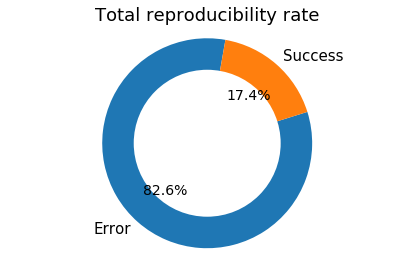

In [11]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['Error',  'Success', ]
sizes = [error, success]
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 15
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=80,  textprops={'fontsize': 14})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Total reproducibility rate", size=18)
plt.tight_layout()

plt.show()

In [12]:
rl_st = pandas.read_csv("run_log_st.csv", delimiter='\t')

In [13]:
def contain_code(el):
    "checks if dataset contains other code"
    temp = el.lower()
    if ".do" in temp:
        return 1
    if ".py" in temp:
        return 1
    if ".java" in temp:
        return 1
    if ".cpp" in temp:
        return 1
    if ".m" in temp:
        return 1
    if ".sas" in temp:
        return 1
    return 0

rl_st['code']=rl_st["all_files"].apply(contain_code)

KeyError: 'all_files'

In [ ]:
rl_st.head()

In [ ]:
len(rl_st)

In [ ]:
df_m = df.merge(rl_st, on="doi", how="left", indicator=True)

In [ ]:
df_m.head()

In [ ]:
df_m = df_m[df_m["_merge"] == "left_only"].drop(columns=["_merge"])

In [ ]:
df_m.head()

In [ ]:
df_m = df_m[df_m.code < 1]

In [ ]:
df_m.head()

In [ ]:
success = (df_m['result'] == 'success').sum()
til = (df_m['result'] == 'time limit exceeded').sum()
error = len(df_m[df_m['result'].str.contains("Error")])


import matplotlib.pyplot as plt

# Pie chart
labels = ['Error',  'Success', "Time Limit Exceeded"]
sizes = [error, success, til]
 
fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 15
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=80,  textprops={'fontsize': 14})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title("Total reproducibility rate", size=18)
plt.tight_layout()

plt.show()